In [1]:
import scipy.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train=scipy.io.loadmat("train_both_smooth.mat")
train_data=train['data']
train_targets=train['targets']
train_targets=train_targets/0.1;

test=scipy.io.loadmat("test_both.mat")
test_data=test['data']
test_targets=test['targets']
test_targets=test_targets/0.1;


# print(train_data.shape)
# print(train_targets.shape)

In [3]:
def get_new_model(input_shape):
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='tanh', 
                              input_shape=input_shape),
        
        tf.keras.layers.Dense(128,activation='tanh'),
        tf.keras.layers.Dense(1000),
        tf.keras.layers.Dense(300),
        
    ])
    return model




In [4]:
model=get_new_model(train_data[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              129000    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               300300    
Total params: 438,068
Trainable params: 438,068
Non-trainable params: 0
_________________________________________________________________


In [5]:
def compile_model(model):
    model.compile(optimizer='adam',loss='mse')

compile_model(model)

In [6]:
def train_model(model,train_data,train_targets,
                validation_data,epochs):
    history=model.fit(train_data,train_targets,epochs=epochs,
                     validation_data=validation_data,
                      batch_size=64,verbose=2)
    
    return history
    

In [7]:
validation_data=(test_data,test_targets)
history=train_model(model,train_data,train_targets,
                    validation_data,epochs=100)

Train on 5000 samples, validate on 1000 samples
Epoch 1/100
5000/5000 - 2s - loss: 0.0915 - val_loss: 0.1219
Epoch 2/100
5000/5000 - 0s - loss: 0.0741 - val_loss: 0.1112
Epoch 3/100
5000/5000 - 0s - loss: 0.0736 - val_loss: 0.1273
Epoch 4/100
5000/5000 - 0s - loss: 0.0727 - val_loss: 0.1121
Epoch 5/100
5000/5000 - 0s - loss: 0.0718 - val_loss: 0.1170
Epoch 6/100
5000/5000 - 0s - loss: 0.0590 - val_loss: 0.1288
Epoch 7/100
5000/5000 - 0s - loss: 0.0491 - val_loss: 0.1266
Epoch 8/100
5000/5000 - 0s - loss: 0.0436 - val_loss: 0.1262
Epoch 9/100
5000/5000 - 0s - loss: 0.0364 - val_loss: 0.1222
Epoch 10/100
5000/5000 - 0s - loss: 0.0304 - val_loss: 0.1200
Epoch 11/100
5000/5000 - 0s - loss: 0.0256 - val_loss: 0.1381
Epoch 12/100
5000/5000 - 0s - loss: 0.0236 - val_loss: 0.1324
Epoch 13/100
5000/5000 - 0s - loss: 0.0220 - val_loss: 0.1269
Epoch 14/100
5000/5000 - 0s - loss: 0.0205 - val_loss: 0.1351
Epoch 15/100
5000/5000 - 0s - loss: 0.0195 - val_loss: 0.1406
Epoch 16/100
5000/5000 - 0s - l

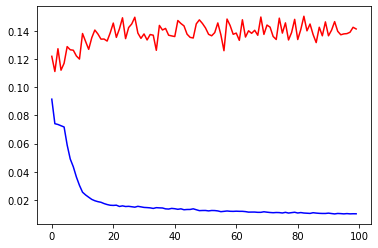

In [8]:
plt.figure
plt.plot(history.history["loss"],'b')
plt.plot(history.history["val_loss"],'r')

In [9]:
prediction=model.predict(train_data)

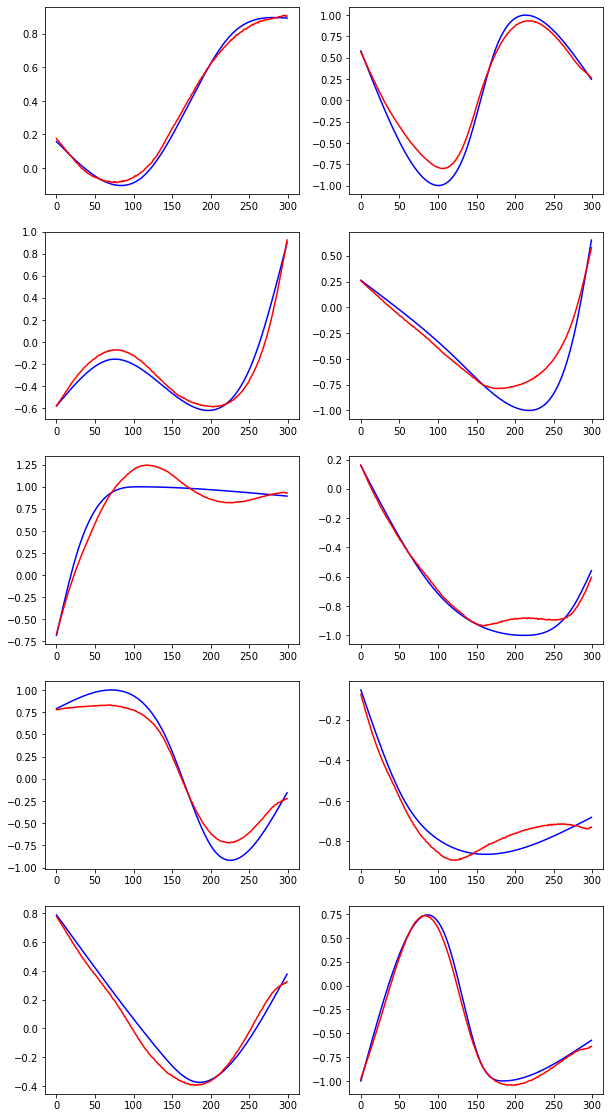

In [12]:
allfigures=10;

index=random.sample(range(0,train_targets.shape[0]),allfigures)

plt.figure(figsize=(10, 20)) 

for i in range(allfigures):
    plt.subplot(5,2,i+1)
    plt.plot(train_targets[index[i]],'b')
    plt.plot(prediction[index[i]],'r')
    plt.axis
    
plt.show()